# Créditos Temu

En el presente notebook se estudian las ventas con tarjetas de crédito en el ecommerce Temu. Donde se analiza el deterioro de la cartera y las caracteristicas de los usuarios que tienen créditos en este ecommerce.

# Cargue y lectura de información

Se important las principales librerías a utilizar y realiza la lecctura de los datos asociados a los créditos de Temu

## Librerías

In [2]:
## Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## Lectura de datos

In [3]:
## Se realiza la lectura de los datos
df = pd.read_excel("../data/DataFramePrueba.xlsx")
df.head(5)

,IdentificadorCliente,FechaEvento,UsabilidadCupo,CategoriaPrincipalCredito,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosGCanalVPrevius,...,TipoMunicipioEntregaTC,CanalMunicipioEntregaTC,NumeroIntentosFallidos,CupoAprobado,UsoAppWeb,ScoreCrediticio,Genero,Edad,DiasMora,PerdidaCartera
0,1,2022-09-19T13:25:31.867Z,0.1184320077740548479,NaN,0.0,9.0,9.0,0.0,9.0,0.0,...,PRINCIPAL,Fisico,0.0,3.000000e+10,NaN,865.0,Femenino,37.0,0,0
1,2,2023-08-23T11:33:46.417Z,0.0771590000000000000,hogar-y-muebles,NaN,5.0,4.0,1.0,4.0,1.0,...,INTERMEDIO,Fisico,0.0,2.000000e+10,NaN,726.0,Femenino,38.0,0,0
2,3,2022-10-01T14:59:48.920Z,0.1855666666666666667,NaN,129.0,33.0,33.0,0.0,33.0,0.0,...,PEQUEÃ‘O,Fisico,1.0,3.000000e+10,NaN,0.0,Femenino,35.0,0,0
3,4,2022-09-22T21:25:09.187Z,null,NaN,0.0,3.0,3.0,0.0,3.0,0.0,...,GRANDE,Fisico,0.0,5.000000e+09,NaN,837.0,Masculino,34.0,0,0
4,5,2023-03-19T17:48:52.310Z,0.4752148710773535878,computacion,0.0,4.0,4.0,0.0,4.0,0.0,...,GRANDE,Fisico,1.0,5.000000e+09,App,487.0,Femenino,55.0,0,0


In [4]:
## Información del dataset de los créditos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146939 entries, 0 to 146938
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IdentificadorCliente                    146939 non-null  int64         
 1   FechaEvento                             146939 non-null  object        
 2   UsabilidadCupo                          146939 non-null  object        
 3   CategoriaPrincipalCredito               114111 non-null  object        
 4   DiasMaximosMoraCreditosGenerados        108968 non-null  float64       
 5   NumeroCreditosGPrevius                  115051 non-null  float64       
 6   NumeroCreditosGCanalFPrevius            115051 non-null  float64       
 7   NumeroCreditosGEstadoActivosPrevius     115051 non-null  float64       
 8   NumeroCreditosGEstadoPagadosPrevius     115051 non-null  float64       
 9   NumeroCreditosGCanalVPrevius         

In [5]:
# Dimensiones del dataset
print('Créditos')
print(df.shape)

Créditos
(146939, 30)


# Análisis Descriptivo y Análisis Exploratorio de Datos (EDA)

En este apartado se estudian los datos para entender los patrónes de incumplimiento de pago de las tarjetas de crédito al ser usadas en Temu.

## Análisis Univariable

Se analizan las variables númericas y categoricas de forma individual.

In [6]:
## Descriptivos
print("Descriptivos de variables númericas:")
df.describe()

Descriptivos de variables númericas:


,IdentificadorCliente,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,NumeroCreditosLEstadoPagadosPrevius,...,TotalPagosEfectuadosGlobalmentePrevius,TotalPagosEfectuadosLocalmentePrevius,CodigoAlmacenEntregaTC,CodigoMunicipioEntregaTC,NumeroIntentosFallidos,CupoAprobado,ScoreCrediticio,Edad,DiasMora,PerdidaCartera
count,146939.00000,108968.000000,115051.000000,115051.000000,115051.000000,115051.000000,115051.000000,115051.000000,115051.000000,115051.000000,...,107923.000000,107923.000000,145115.000000,145109.000000,146811.000000,1.462790e+05,146848.000000,145341.000000,146939.000000,146939.000000
mean,73470.00000,77.787626,12.063155,11.622046,0.292592,11.723644,0.441109,0.359754,0.027058,0.247177,...,34.402481,0.813163,83930.144244,124.663384,0.303315,1.395009e+10,529.940101,31.616928,203.896113,0.225509
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000e+09,-9.000000,18.000000,0.000000,0.000000
25%,36735.50000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,7077.000000,-1.000000,0.000000,4.000000e+09,520.000000,24.000000,0.000000,0.000000
50%,73470.00000,0.000000,6.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,0.000000,29752.000000,4.000000,0.000000,1.000000e+10,611.000000,29.000000,0.000000,0.000000
75%,110204.50000,48.000000,15.000000,15.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.000000,131009.000000,139.000000,0.000000,3.000000e+10,687.000000,37.000000,0.000000,0.000000
max,146939.00000,3309.000000,349.000000,349.000000,31.000000,349.000000,58.000000,123.000000,13.000000,29.000000,...,1102.000000,81.000000,811020.000000,1126.000000,130.000000,1.000000e+11,999.000000,99.000000,1800.000000,1.000000
std,42417.77994,224.206547,17.146242,17.003708,1.086592,17.013161,1.387426,1.136460,0.215295,0.808488,...,50.421206,2.630389,106631.721637,210.947443,1.209912,1.151370e+10,254.322400,9.806177,450.909210,0.417918


Se observan un poco los estadisticos de las variables númericas. Donde se pue decir que el promedio en cuanto al número de céditos GP Previus es de 12 créditos diferentes antes de obtener el crédito en Temu.

In [8]:
## Se definien funciones para generar el histgrama y diagrama de cajas y bigotes

### Función para generar box plot
def plot_box_plots(df, numeric_vars):
    num_vars = len(numeric_vars)
    rows = (num_vars // 3) + (num_vars % 3 > 0)
    
    plt.figure(figsize=(20, rows * 5))
    plt.suptitle('Box plot por variable de interés', fontweight='black', fontsize=20)

    for i, var in enumerate(numeric_vars):
        plt.subplot(rows, 3, i + 1)
        sns.boxplot(x=df[var], palette='rainbow')
        plt.xlabel(var, fontweight='black', fontsize=15)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



### Función para histogramas
def plot_histograms(df, numeric_vars):
    num_vars = len(numeric_vars)
    rows = (num_vars // 3) + (num_vars % 3 > 0)
    
    plt.figure(figsize=(20, rows * 5))
    plt.suptitle('Histogramas por variable de interés', fontweight='black', fontsize=20)

    for i, var in enumerate(numeric_vars):
        plt.subplot(rows, 3, i + 1)
        sns.histplot(df[var], kde=True, color='skyblue')
        plt.xlabel(var, fontweight='black', fontsize=15)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


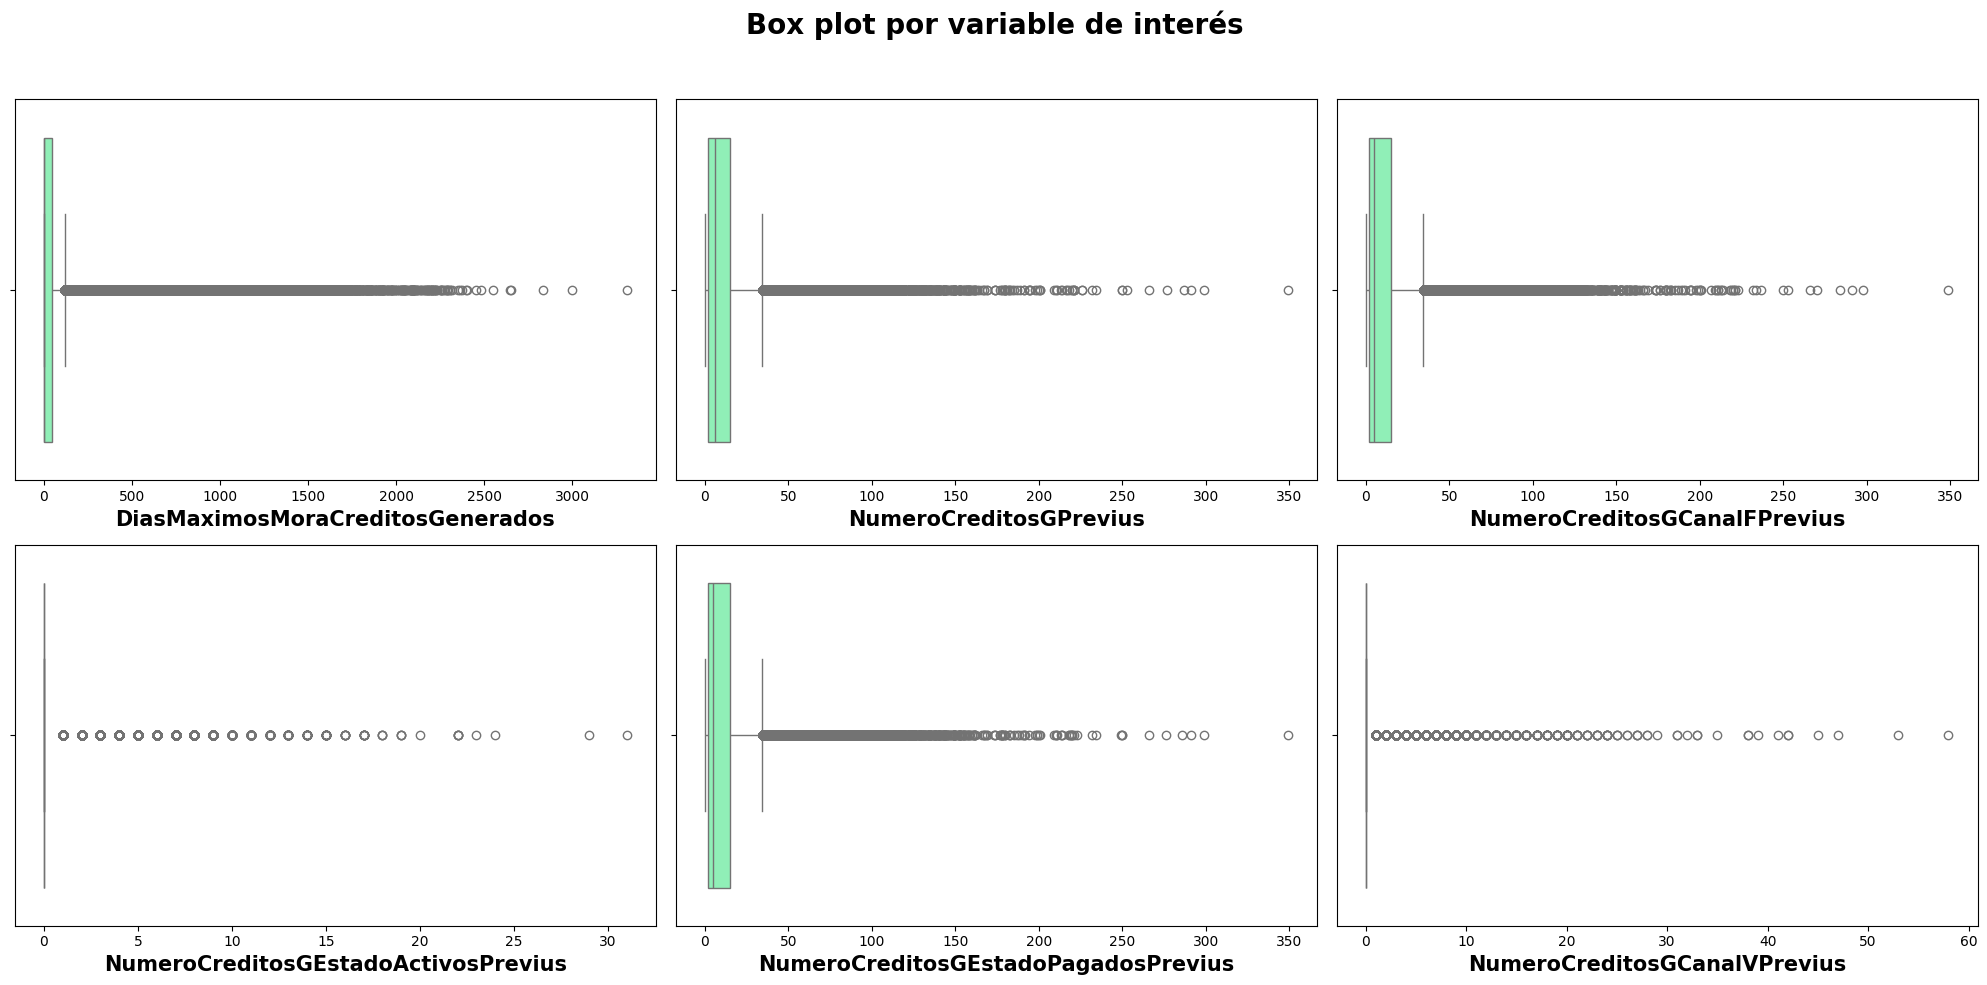

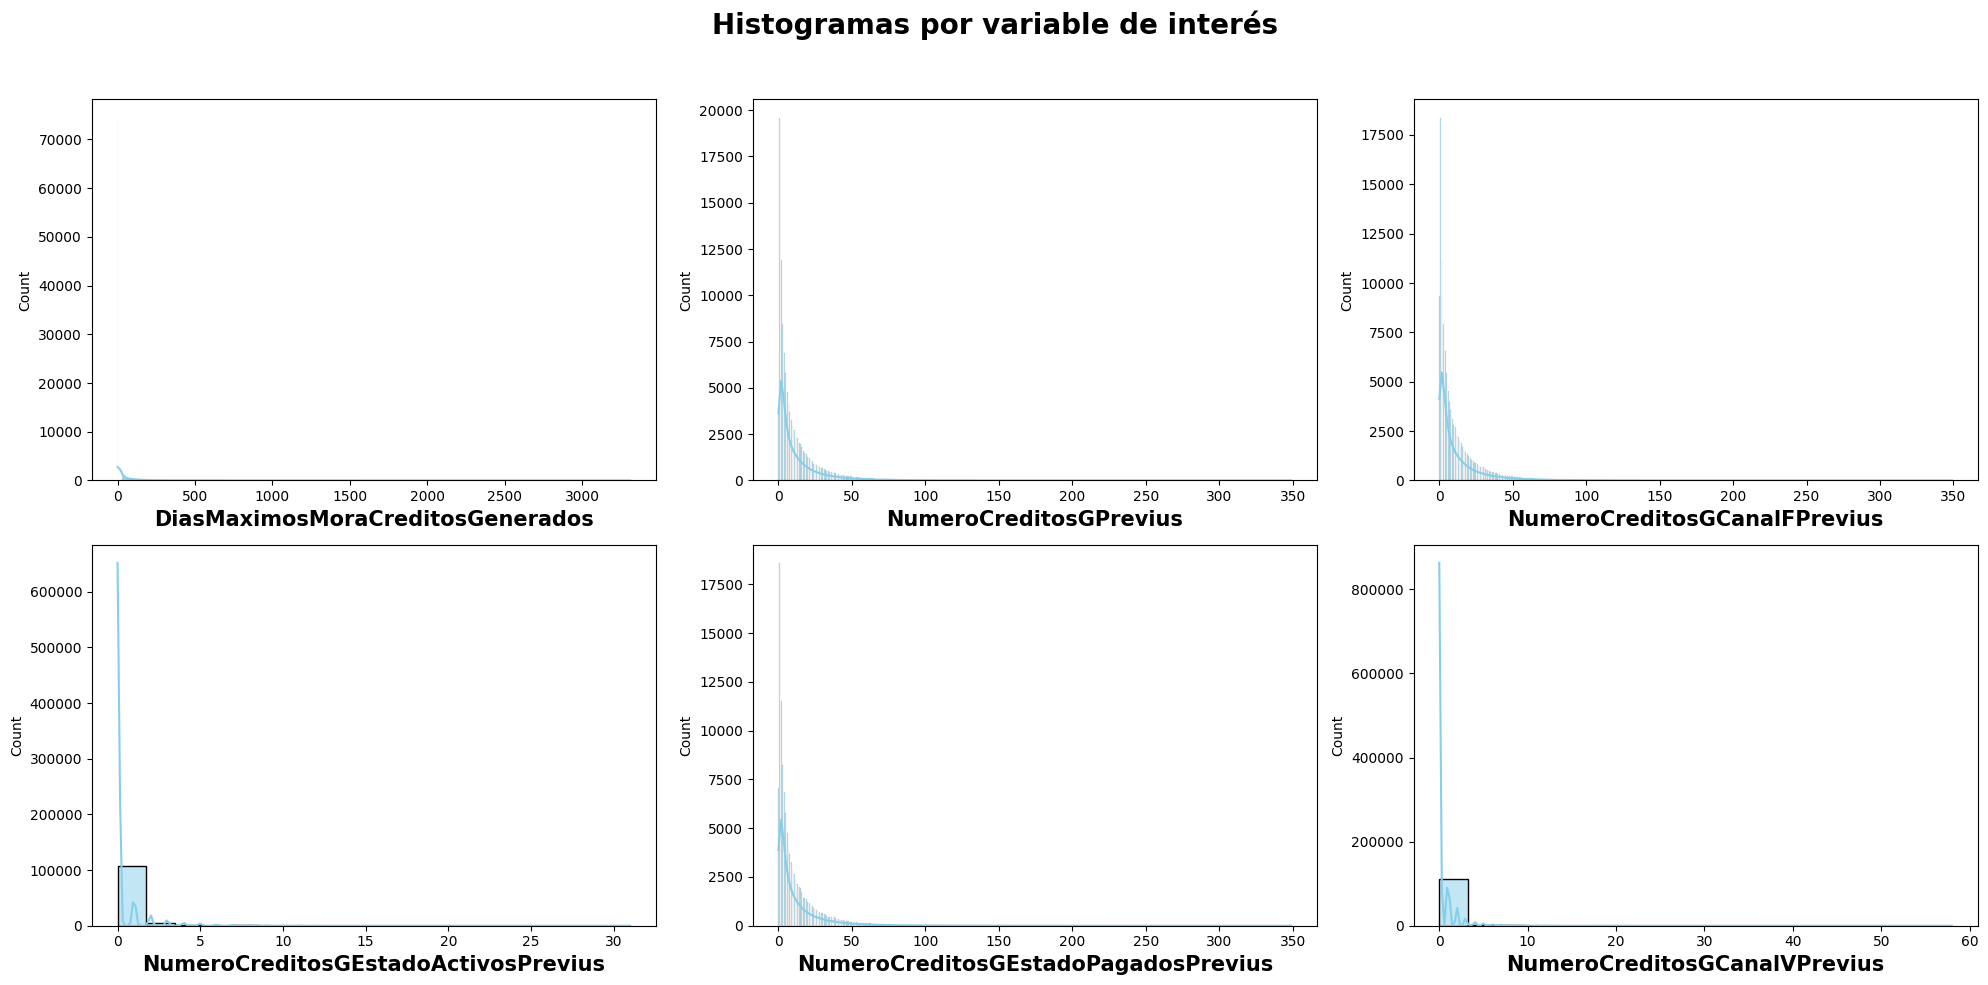

In [9]:
## Estudiar diagramas de cajas para las variables númericas
numeric_vars = ['DiasMaximosMoraCreditosGenerados', 'NumeroCreditosGPrevius', 'NumeroCreditosGCanalFPrevius',
                'NumeroCreditosGEstadoActivosPrevius', 'NumeroCreditosGEstadoPagadosPrevius', 'NumeroCreditosGCanalVPrevius']

plot_box_plots(df, numeric_vars)
plot_histograms(df, numeric_vars)

Se puede observar que las distribuciones de las variables analizadas no son símetricas, donde la cola de la distribución se alarga hacia los valores superiores a la media, también se pueden apreciar algunos valores atípicos en la distribución de los datos. En el caso de la variable número de céditos GP Previus se puede observar que la gran mayoría de los usuarios han tenido menos de 50 créditos antes de obtener el crédito de Temu.

In [12]:
## Porcentaje de créditos que se habilitaron en Temu

len(df.query('NumeroCreditosGPrevius==0')['NumeroCreditosGPrevius']) / len(df.NumeroCreditosGPrevius)

0.02712690300056486

Un 2.7% de creditos fueron habílitados en Temu, esto quiere decir que la mayoría de los usuarios ya habían empleado su tarjeta en otros establecimientos. 

In [14]:
## Porcentaje de créditos activos

len(df.query('NumeroCreditosGEstadoActivosPrevius==0')['NumeroCreditosGEstadoActivosPrevius']) / len(df.NumeroCreditosGEstadoActivosPrevius)

0.682276318744513

Se tiene que un 68% de los usuarios no tienen créditos activos antes de Temu

In [15]:
len(df.query('NumeroCreditosLEstadoActivosPrevius==0')['NumeroCreditosLEstadoActivosPrevius']) / len(df.NumeroCreditosLEstadoActivosPrevius)

0.7668284117899264

Un 76.7% de los usuarios no tienen créditos activos en Temu

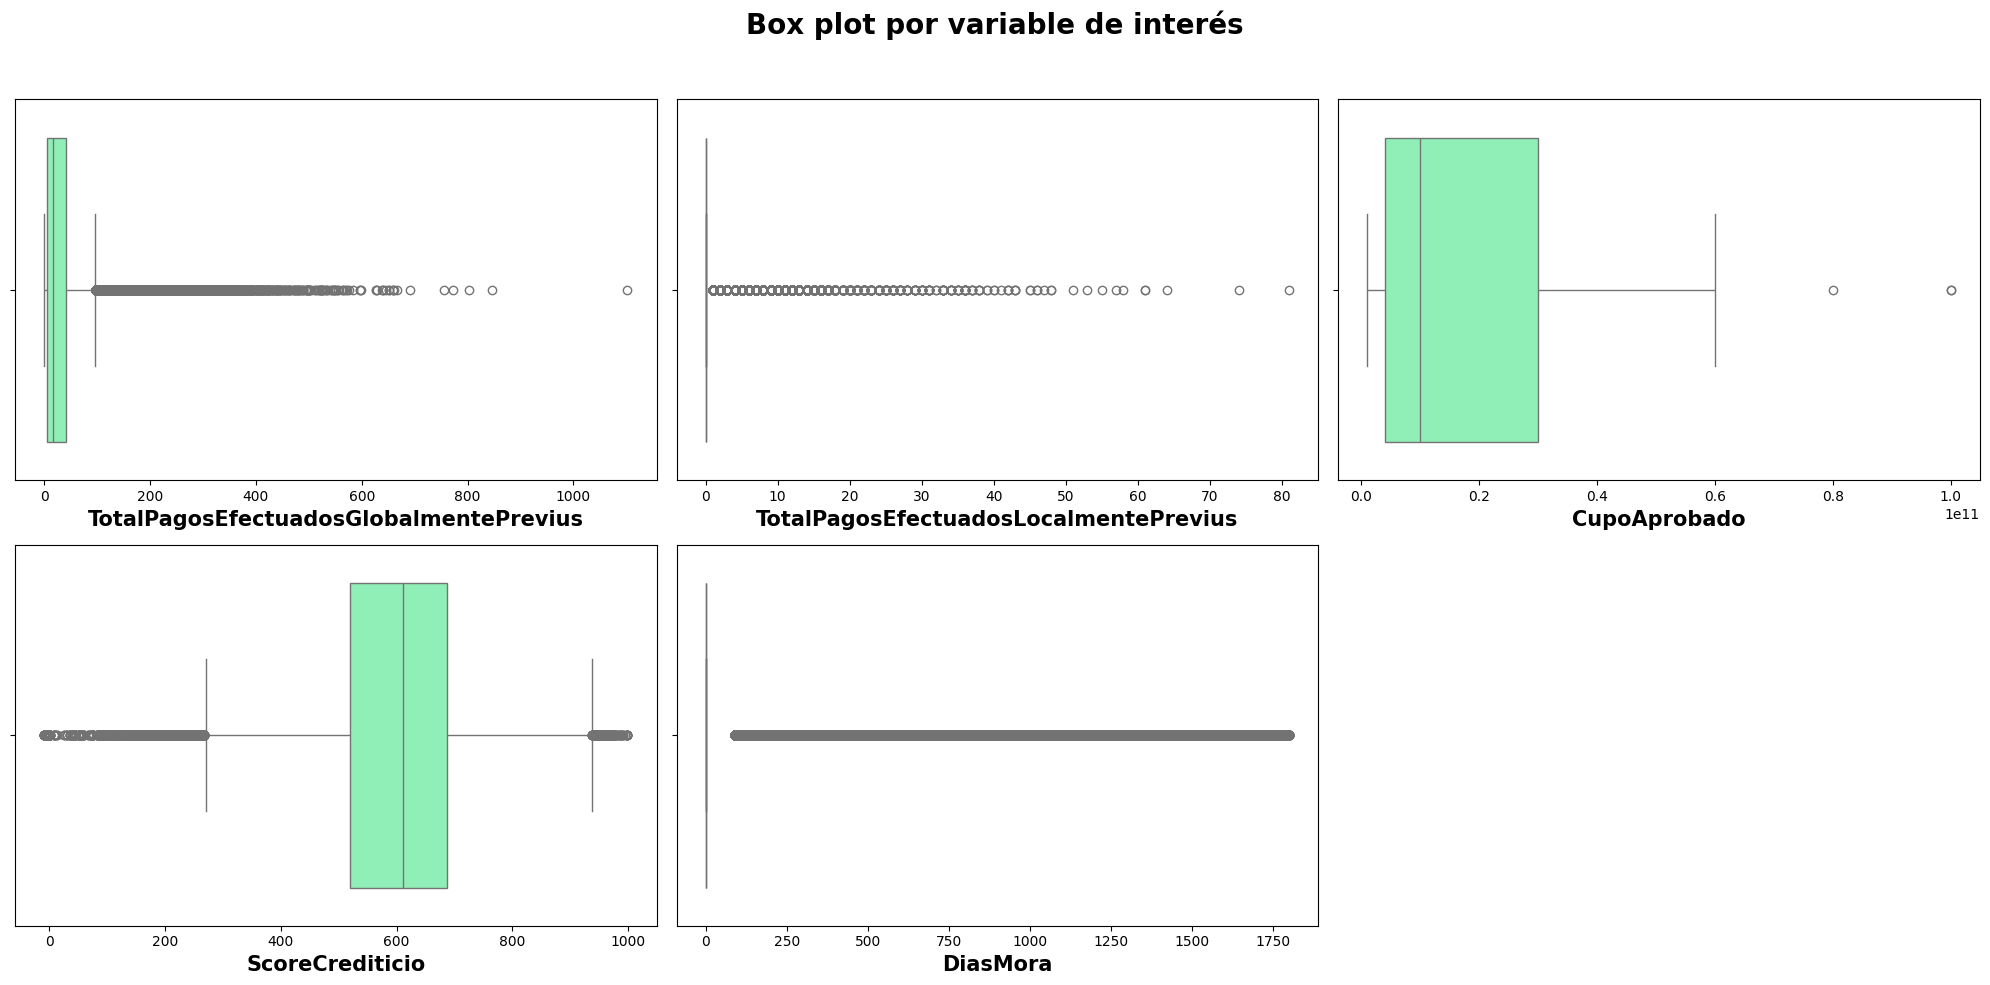

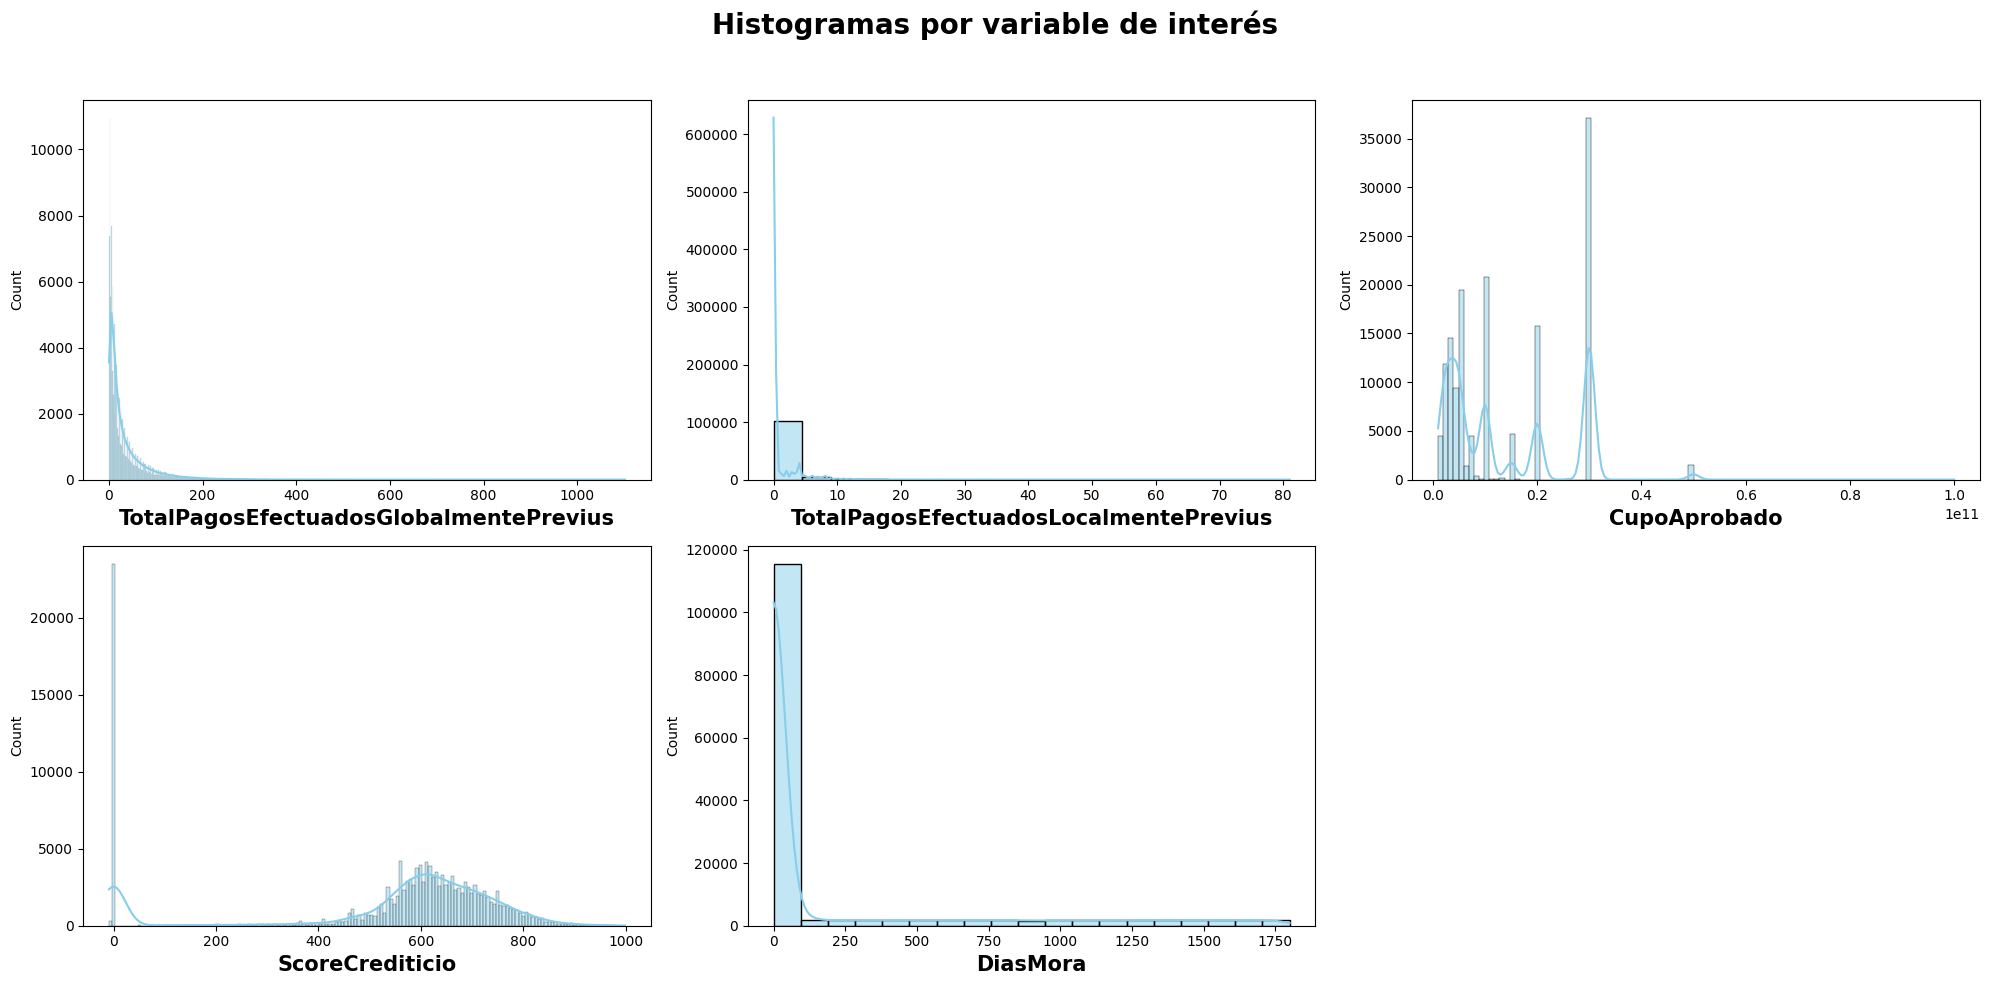

In [16]:
## Estudiar diagramas de cajas para las variables númericas
numeric_vars = ['TotalPagosEfectuadosGlobalmentePrevius', 'TotalPagosEfectuadosLocalmentePrevius', 'CupoAprobado',
                'ScoreCrediticio', 'DiasMora']

plot_box_plots(df, numeric_vars)
plot_histograms(df, numeric_vars)

Se puede observar en la distribución de los días de mora que la mayoría de obligaciones que se encuentran en mora tienen menos de un año en cuantoa altura de mora se refiere.

In [29]:
## Demanda por categoría

fig = px.bar(df.groupby(['CategoriaPrincipalCredito'])['IdentificadorCliente'].count().head(10).sort_values(ascending=True),
             title='TOP 10 Cantidad de compras por categoría principal de crédito',text_auto='.2s',labels={'value':'Cantidad', 'CategoriaPrincipalCredito':'Categorias'},orientation='h',
            color_continuous_scale = 'viridis')
fig.show()

El 23% del uso se la tarjeta de crédito en Temu se emplea en la categoría de celulares y telefonos, un 18% en belleza y cuidados de la piel, y un 10% en ctegorías como hogar y electronica.

In [52]:
### Canal de entrega de la tarjeta. 

pie = df.groupby(['CanalMunicipioEntregaTC'])['IdentificadorCliente'].count()


fig2 = px.pie(pie, values=pie.values, names=['Fisico','Virtual'],
            title='Proporción canal entrega de tarjeta')
fig2.show()

De los usuarios que emplearon su tarjeta en el establecimiento Temu, el 63% obtuviero la tarjeta por canal fisico.

In [56]:
## Intentos Fallidos en Aprobación de la tarjeta.
df.NumeroIntentosFallidos.value_counts(normalize=True)

NumeroIntentosFallidos
0.0      0.844494
1.0      0.094952
2.0      0.031054
3.0      0.013248
4.0      0.006117
5.0      0.003453
6.0      0.002057
7.0      0.001294
8.0      0.000892
9.0      0.000538
10.0     0.000341
11.0     0.000293
12.0     0.000211
16.0     0.000150
13.0     0.000136
15.0     0.000136
14.0     0.000102
17.0     0.000075
19.0     0.000061
18.0     0.000054
22.0     0.000054
20.0     0.000041
24.0     0.000041
21.0     0.000020
33.0     0.000020
27.0     0.000014
36.0     0.000014
23.0     0.000014
25.0     0.000014
32.0     0.000014
29.0     0.000014
54.0     0.000007
28.0     0.000007
30.0     0.000007
106.0    0.000007
43.0     0.000007
34.0     0.000007
31.0     0.000007
59.0     0.000007
130.0    0.000007
49.0     0.000007
89.0     0.000007
41.0     0.000007
Name: proportion, dtype: float64

El 84% de los usuarios que utilizaron su tarjeta en el establecimineto Temu, no tivieron intentos fallidos en la aprobación de la tarjeta de crédito. 

In [61]:
fig = px.bar(df.PerdidaCartera.value_counts(), title='Perdida de Cartera',text_auto='.2s')
fig.show()

Se puede observar que el 77% de los usuarios se encuentran al día en las oblicagiones se sus tarjetas. 

## Análsis Multivariado